# 1.

## Accuracy:

An application when accuracy is needed is predicting sports outcomes. The rationale behind why accuracy, in this case, is important is that understanding how effective someone's strategy is in predicting a sports event allows them to make changes and improve their model to make more profits. If they couldn't know how accurate each model they made was, then they'd be essentially picking an outcome with no way to confirm if their process was good.

## Sensitivity:

Sensitivity is needed when screening for a threatening disease. When someone is considering how to proceed in their treatment, it's best to have a sensitive model to detect a possible disease like cancer. High sensitivity ensures that most true positives are detected while reducing the risk of overlooking any major condition.

## Specificity:

A scenario where specificity is used is fraud detection in banking systems. A banking system with a high specificity ensures that real transactions don't get flagged for fraudulent activity, but true frauds do. This helps reduce the number of unnecessary paperwork and situations with police getting involved when someone is flagged for fraudulent activity.

## Precision:

Situations with high false positives require high precision, like when filtering spam mail. A high-precision model ensures that spam mail is correctly identified as spam mail and that real mail is not missed. This is most useful in scenarios where the consequences of false alarms outweigh the benefit of catching every positive.

# 4.

In [2]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, recall_score, make_scorer
import graphviz as gv

url = "https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv"
ab = pd.read_csv(url, encoding="ISO-8859-1")
# create `ab_reduced_noNaN` based on the specs above

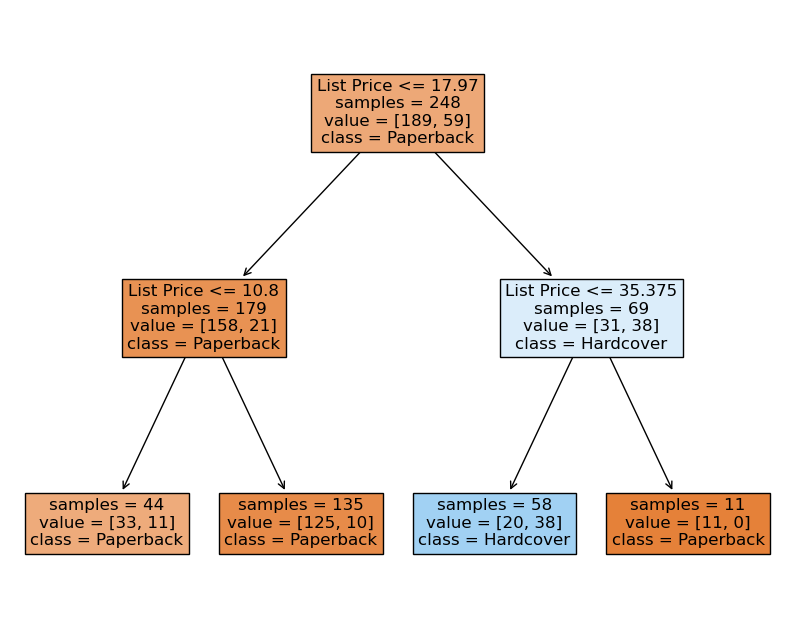

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Prepare data (assuming ab_reduced_noNaN is already cleaned)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']
X = ab_reduced_noNaN[['List Price']]

# Split data into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Decision Tree Classifier on the 80% training data
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Visualize the trained decision tree
plt.figure(figsize=(10, 8))  # Adjust the figure size

# Create tree plot with relevant information and suppress impurity and sample size
plot_tree(clf, 
          feature_names=['List Price'], 
          class_names=["Paperback", "Hardcover"], 
          filled=True, 
          fontsize=12, 
          impurity=False,  # Suppress Gini impurity
          node_ids=False,  # Do not show node IDs
          proportion=False,  # Suppress proportions of classes
          label='all')  # Include decision rules and class names

# Show the tree
plt.show()


In [8]:
# Drop rows with NaN values
ab_reduced_noNaN = ab.dropna()

# Split the data into an 80% training set and a 20% testing set
ab_reduced_noNaN_train, ab_reduced_noNaN_test = train_test_split(
    ab_reduced_noNaN, test_size=0.2, random_state=42
)

# Report the number of observations in each dataset
train_size = ab_reduced_noNaN_train.shape[0]
test_size = ab_reduced_noNaN_test.shape[0]

print(f"Number of observations in the training dataset: {train_size}")
print(f"Number of observations in the testing dataset: {test_size}")

Number of observations in the training dataset: 248
Number of observations in the testing dataset: 62


The predictions made based on List Price for the fitted clf model were that 190 books are Paperback and 58 are Hardcover. This gives an accuracy of about 90% in predicting the outcome correctly.

# 5.

Accuracy for clf2: 0.8548

Classification Report for clf2:
              precision    recall  f1-score   support

       False       0.89      0.91      0.90        43
        True       0.78      0.74      0.76        19

    accuracy                           0.85        62
   macro avg       0.83      0.82      0.83        62
weighted avg       0.85      0.85      0.85        62



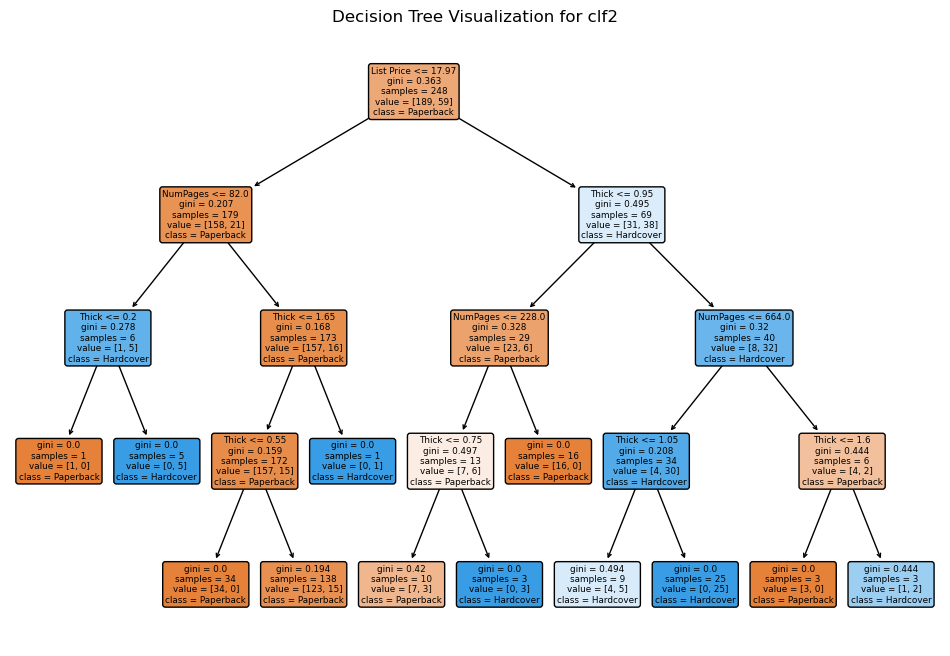

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#Define the feature matrix (X) and target variable (y)
y = pd.get_dummies(ab_reduced_noNaN["Hard_or_Paper"])['H']  # 1 for hardcover, 0 for paperback
X = ab_reduced_noNaN[['NumPages', 'Thick', 'List Price']]  # Use 'NumPages', 'Thick', and 'List Price' as the features

#Split data into training (80%) and testing (20%) sets (same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train the DecisionTreeClassifier with max_depth=4
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)  # Limit the tree depth to 4
clf2.fit(X_train, y_train)  # Train the model

#Predict the target variable for the test set using clf2
y_pred = clf2.predict(X_test)

#Calculate accuracy and classification report for clf2
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy for clf2: {accuracy:.4f}")
print("\nClassification Report for clf2:")
print(classification_report(y_test, y_pred))

#Visualize the trained tree
plt.figure(figsize=(12, 8))
tree.plot_tree(clf2, 
               feature_names=['NumPages', 'Thick', 'List Price'], 
               class_names=['Paperback', 'Hardcover'], 
               filled=True, 
               rounded=True)
plt.title("Decision Tree Visualization for clf2")
plt.show()


# 6. 

## Confusion Matrix cfl:

Accuracy on test data: 0.903
Classification Report:
              precision    recall  f1-score   support

   Paperback       0.95      0.91      0.93        43
   Hardcover       0.81      0.89      0.85        19

    accuracy                           0.90        62
   macro avg       0.88      0.90      0.89        62
weighted avg       0.91      0.90      0.90        62

Confusion Matrix:
[[39  4]
 [ 2 17]]


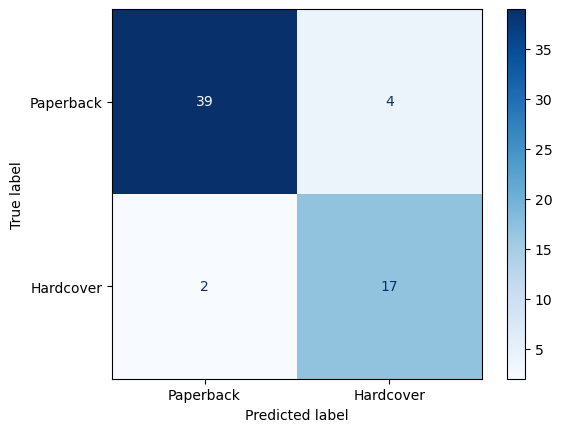

In [17]:
# Use the trained model to predict on the 20% test set
y_test_predictions = clf.predict(X_test)

# Evaluate the model's performance on the test set
test_accuracy = accuracy_score(y_test, y_test_predictions)
print(f"Accuracy on test data: {test_accuracy:.3f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_test_predictions, target_names=["Paperback", "Hardcover"]))

# Confusion Matrix
print("Confusion Matrix:")
test_conf_matrix = confusion_matrix(y_test, y_test_predictions)
print(test_conf_matrix)

# Visualize the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=test_conf_matrix, display_labels=["Paperback", "Hardcover"])
disp.plot(cmap="Blues")

## Confusion Matrix cfl2:

Accuracy on test data: 0.855

Classification Report:
              precision    recall  f1-score   support

       False       0.89      0.91      0.90        43
        True       0.78      0.74      0.76        19

    accuracy                           0.85        62
   macro avg       0.83      0.82      0.83        62
weighted avg       0.85      0.85      0.85        62



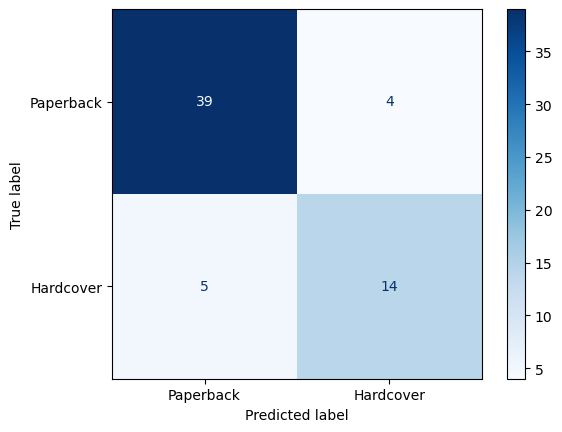

In [21]:
#Predict the target variable for the test set using clf2
y_pred = clf2.predict(X_test)

#Calculate accuracy and classification report for clf2
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test data: {accuracy:.3f}")

#Generate the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

#Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Display the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Paperback', 'Hardcover'])
disp.plot(cmap='Blues', values_format='d')

# 7.

The cause of the differences between the confusion matrices is overfitting and generalization. Often, a model is better on the training set because it is built upon this data and better tailors its decision boundaries to fit it closely. The other confusion matrices are based on the testing set, so their predictions are less accurate as their decision boundaries aren't tailored by known data. Discrepancies between the training and testing confusion matrices occur when a model is underfitted or overfitted. Overfitting is a common cause of good training performance but poorer testing accuracy.

## Chatbot Summaries:

### Chatbot 1: 

We discussed the real-world applications of four performance metrics used in classification problems and how their relevance depends on the context. Accuracy is most suitable for balanced datasets where both false positives and false negatives carry similar consequences, such as in quality control during manufacturing. Sensitivity (true positive rate) is crucial in scenarios where missing a positive case has severe implications, like in medical diagnostics for critical diseases such as cancer, where identifying every true positive is essential. On the other hand, specificity (true negative rate) is vital in cases where avoiding false positives is a priority, such as in security screenings or when identifying rare conditions in healthy populations. Finally, precision (positive predictive value) is best applied in situations where false positives are costly or problematic, such as fraud detection in banking, where misclassifying legitimate transactions as fraudulent can lead to customer inconvenience and loss of trust. Ultimately, the choice of metric depends on the problem’s context, the consequences of different types of errors, and the distribution of classes in the dataset.

Link: https://chatgpt.com/c/673d0c2a-9504-800c-843a-0b455c84aeef

### Chatbot 2:

Decision Tree Classifier: You worked on fitting decision tree classifiers (clf and clf2) using the Amazon books dataset. The first model (clf) used "List Price" as a single feature with a max depth of 2, while the second model (clf2) used multiple features ("NumPages," "Thick," and "List Price") with a max depth of 4.

Confusion Matrices: You wanted to evaluate the performance of these classifiers using confusion matrices. We discussed how to generate and interpret them, including why using additional features (for clf2) can improve predictions compared to a simpler model like clf.

Training vs. Testing Data: We addressed the differences in performance between the training and testing sets. The conversation highlighted that models typically perform better on training data because they "see" it during training, while testing data evaluates their generalization to unseen data. This distinction is crucial for understanding overfitting and generalization.

Code Debugging: You encountered issues generating confusion matrices and visualization. We debugged the code and implemented fixes to correctly generate and display confusion matrices for both clf and clf2.

Link: https://chatgpt.com/c/673d17dc-e954-800c-8e8b-e3e509ff67c3

### Chatbot 3: 

Here's a summary of our conversation:

You shared a Python task involving a dataset of Amazon books. Your goal is to:

Create a cleaned DataFrame (ab_reduced_noNaN) by handling missing values.
Perform an 80/20 train-test split on this cleaned dataset to create training and testing sets.
Train a DecisionTreeClassifier using the "List Price" variable to predict whether a book is a hardcover or paperback, limiting the tree's depth to 4.
I explained the two main steps: splitting the data and training the model. Then, I provided code to:

Handle missing values and prepare the data.
Perform the train-test split using train_test_split.
Train the decision tree model (clf) using only "List Price" as the feature.
Evaluate the model's accuracy and recall.
Visualize the fitted decision tree using tree.plot_tree.
Finally, I clarified the roles of each step and suggested exploring the visualization to understand how "List Price" influences predictions. Let me know if you need further clarification or modifications!

Link: https://chatgpt.com/c/673d1c69-3f80-800c-9de5-e111c2e9bb1d